In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv(r"C:\Yash_MS\sem_1\Machine_intelligence\project\car.csv")
data.head()

,Cost,Maintenance,No. of doors,Passengers,luggage capacity,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
Cost_label = {i:j for j,i in enumerate(set(data['Cost']))}
Maintenance_label = {i:j for j,i in enumerate(set(data['Maintenance']))}
NoOfDoors_label = {i:j for j,i in enumerate(set(data['No. of doors']))}
Passengers_label = {i:j for j,i in enumerate(set(data['Passengers']))}
luggageCapacity_label = {i:j for j,i in enumerate(set(data['luggage capacity']))}
Safety_label = {i:j for j,i in enumerate(set(data['Safety']))}
Class_label = {i:j for j,i in enumerate(set(data['Class']))}

Cost_label
Maintenance_label
NoOfDoors_label
Passengers_label
luggageCapacity_label
Safety_label
Class_label

{'good': 0, 'vgood': 1, 'acc': 2, 'unacc': 3}

In [5]:
data.shape

(1728, 7)

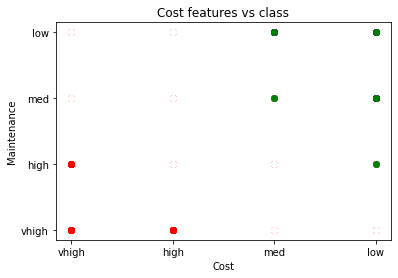

<Figure size 432x288 with 0 Axes>

In [6]:
colors = {'unacc':'r', 'acc':'w', 'good':'b', 'vgood':'g'}

# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(data['Cost'])):
    ax.scatter(data['Cost'][i], data['Maintenance'][i],color=colors[data.Class[i]])
# set a title and labels
ax.set_title('Cost features vs class')
ax.set_xlabel('Cost')
ax.set_ylabel('Maintenance')
ax.plot(label = 'unacc')

plt.show()
plt.savefig("Cost.png", dpi=300)

In [7]:
data['Class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: Class, dtype: int64

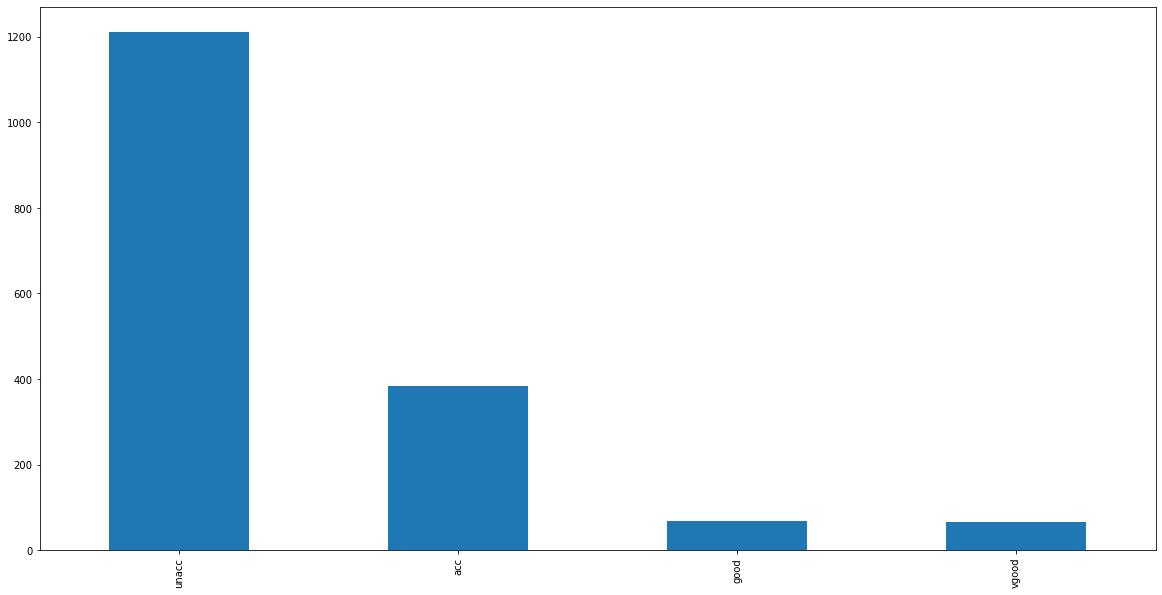

In [8]:
a = data['Class'].value_counts().plot(kind = 'bar',figsize = (20,10))


In [9]:
data1 = data
lb=LabelEncoder()
for i in data1.columns:
    data1[i] = lb.fit_transform(data1[i])
data1.head()

,Cost,Maintenance,No. of doors,Passengers,luggage capacity,Safety,Class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


<AxesSubplot:>

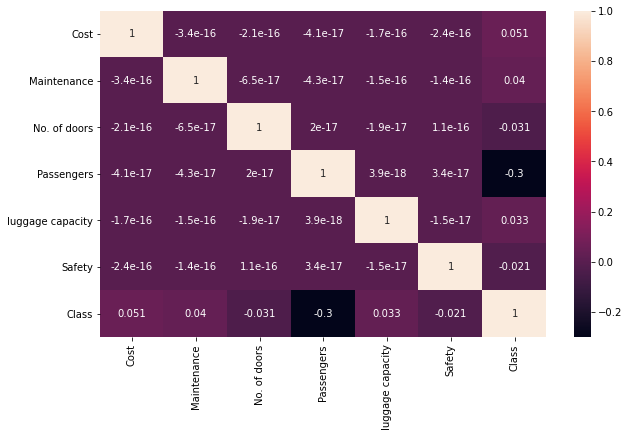

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(data1.corr(),annot=True)

In [11]:
Cost_label


{'med': 0, 'low': 1, 'high': 2, 'vhigh': 3}

In [12]:
Maintenance_label

{'med': 0, 'low': 1, 'high': 2, 'vhigh': 3}

In [13]:
NoOfDoors_label

{'2': 0, '5more': 1, '4': 2, '3': 3}

In [14]:
Passengers_label


{'2': 0, '4': 1, 'more': 2}

In [15]:
luggageCapacity_label


{'small': 0, 'big': 1, 'med': 2}

In [16]:
Safety_label


{'low': 0, 'high': 1, 'med': 2}

In [17]:
Class_label

{'good': 0, 'vgood': 1, 'acc': 2, 'unacc': 3}

In [18]:
reg = linear_model.LinearRegression()
reg.fit(data1[['Cost', 'Maintenance', 'No. of doors', 'Passengers', 'luggage capacity', 'Safety']],data1.Class)
reg.predict([[1,1,1,0,0,0]])

array([1.83778935])

In [19]:
features = ['Cost', 'Maintenance', 'No. of doors', 'Passengers', 'luggage capacity', 'Safety']
x = data1[features]
x.describe()
y=data1.Class

In [20]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

Accuracy of test data: 0.861271676300578


Confusion Matrix -->
[[ 39   0  15   5]
 [  8   0   0   6]
 [ 11   0 246   3]
 [  0   0   0  13]]


Classification Report
              precision    recall  f1-score   support

           0       0.67      0.66      0.67        59
           1       0.00      0.00      0.00        14
           2       0.94      0.95      0.94       260
           3       0.48      1.00      0.65        13

    accuracy                           0.86       346
   macro avg       0.52      0.65      0.57       346
weighted avg       0.84      0.86      0.85       346

Accuracy of train data: 0.8581765557163531


Confusion Matrix -->
[[241   0  46  38]
 [ 31   0   0  24]
 [ 54   0 893   3]
 [  0   0   0  52]]


Classification Report
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       325
           1       0.00      0.00      0.00        55
           2       0.95      0.94      0.95       950
           3    

C:\Users\yashs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yashs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yashs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yashs\anaconda3\lib\site-packages\sklearn\metr

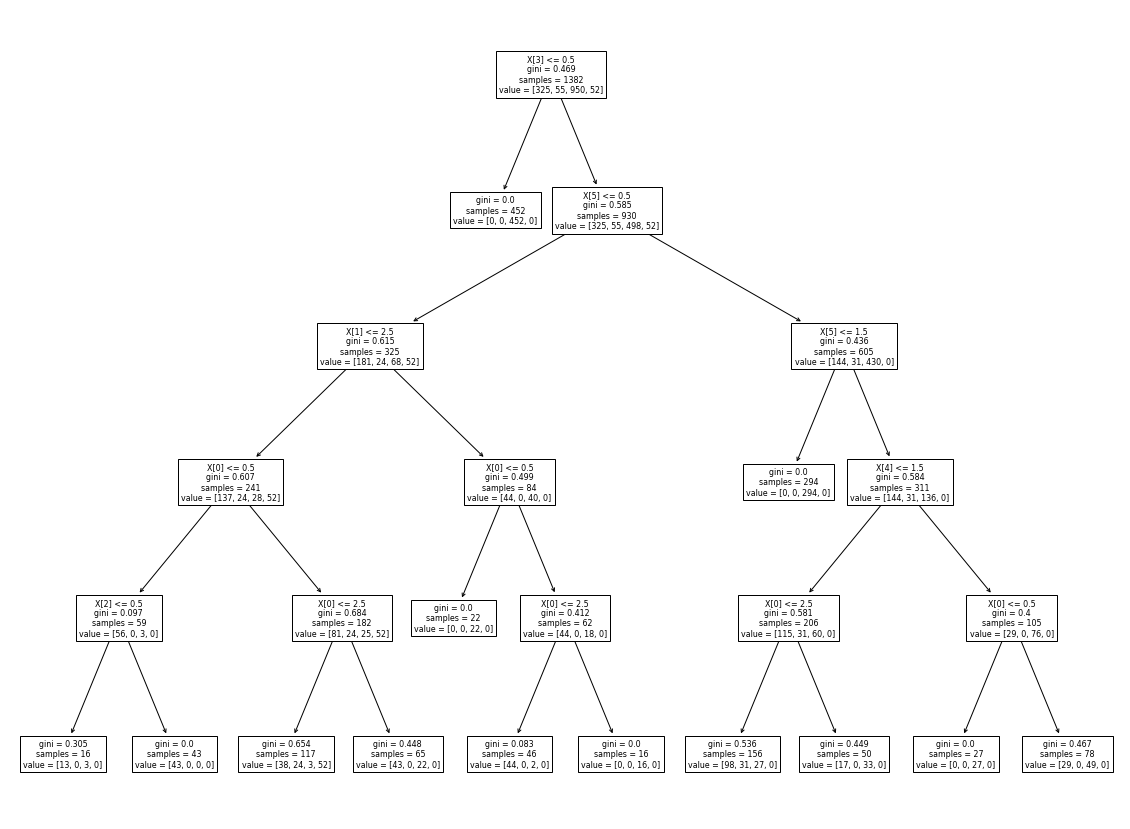

In [21]:
DT = DecisionTreeClassifier(max_depth=5)
DT.fit(x_train,y_train)

plt.figure(figsize=(20,15))
plot_tree(DT)


yTest_pred = DT.predict(x_test)
yTrain_pred = DT.predict(x_train)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Accuracy of test data:",accuracy_score(y_test, yTest_pred))
print("\n\nConfusion Matrix -->")
print(confusion_matrix(y_test,yTest_pred))
print("\n\nClassification Report")
print(classification_report(y_test,yTest_pred))

print("Accuracy of train data:",accuracy_score(y_train, yTrain_pred))
print("\n\nConfusion Matrix -->")
print(confusion_matrix(y_train, yTrain_pred))
print("\n\nClassification Report")
print(classification_report(y_train, yTrain_pred))


In [22]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier(n_estimators=100)

RF.fit(x_train,y_train)

yTrain_pred=RF.predict(x_train)
yTest_pred=RF.predict(x_test)
print("Accuracy of Test data:",accuracy_score(y_test, yTest_pred))
print(classification_report(y_test,yTest_pred))
print(confusion_matrix(y_test,yTest_pred))

print("Accuracy of Train data:",accuracy_score(y_train, yTrain_pred))
print(classification_report(y_train, yTrain_pred))
print(confusion_matrix(y_train, yTrain_pred))

Accuracy of Test data: 0.9826589595375722
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        59
           1       1.00      0.86      0.92        14
           2       1.00      0.98      0.99       260
           3       1.00      1.00      1.00        13

    accuracy                           0.98       346
   macro avg       0.98      0.96      0.97       346
weighted avg       0.98      0.98      0.98       346

[[ 59   0   0   0]
 [  2  12   0   0]
 [  4   0 256   0]
 [  0   0   0  13]]
Accuracy of Train data: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       325
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00       950
           3       1.00      1.00      1.00        52

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00     

In [23]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 5)

# feeding the training data into the model
KNN.fit(x_train, y_train)

# predicting the values for x-test
y_pred = KNN.predict(x_test)

print("Accuracy with train data: ",KNN.score(x_train, y_train))
print("Accuracy with test data: ", KNN.score(x_test, y_test))

Accuracy with train data:  0.9363241678726484
Accuracy with test data:  0.8930635838150289


No handles with labels found to put in legend.


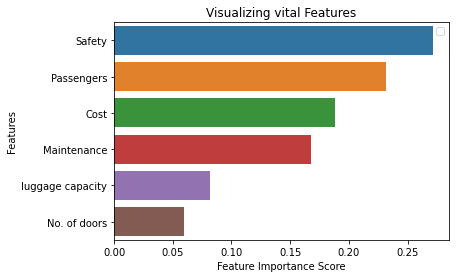

In [24]:
#most important features

vital_feature = pd.Series(RF.feature_importances_,index=features).sort_values(ascending=False)
vital_feature

import seaborn as sns

# Creating a bar plot
vital = sns.barplot(x=vital_feature, y=vital_feature.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing vital Features")
plt.legend()
plt.show()
vital.figure.savefig('vital features.jpg')